# Data Analysis and Visualization with Pandas and Matplotlib

## 1. Introduction to Pandas
🐼🐼🐼🐼

### Pandas

Pandas is a powerful data manipulation and analysis library for Python.

Key features: 🔑🔑🔑🔑🔑


- DataFrame: 2D labeled data structure with columns of potentially different types
- Series: 1D labeled array that can hold data of any type
- Powerful data alignment and integrated handling of missing data
- Merging and joining datasets
- Time series functionality

 

Pandas is great for loading, cleaning, and analysing structured data.

[pandas-dev GitHub](https://github.com/pandas-dev/pandas)
[pandas Website](https://pandas.pydata.org/)

#### 1. **DataFrame**
- **Definition**: A DataFrame is a 2D (two-dimensional) labeled data structure, similar to a table or a spreadsheet. It consists of rows and columns where each column can hold data of different types (e.g., integers, floats, strings, etc.).
- **Structure**: 
  - **Rows**: Represent individual records or observations.
  - **Columns**: Represent different variables or features.
  - **Index**: Labels for the rows, which can be customized.
  
  **Example**:
  | Name  | Age | Salary  |
  |-------|-----|---------|
  | Alice | 28  | 70000   |
  | Bob   | 34  | 80000   |
  | Carol | 23  | 65000   |

  In this DataFrame:
  - Columns: "Name", "Age", "Salary".
  - Rows: Individual records (Alice, Bob, Carol).
  - The data types are different across columns: "Name" is a string, "Age" is an integer, and "Salary" is a float.

#### 2. Series

- **Definition**: A Series is a 1D (one-dimensional) labeled array that can hold data of any type, similar to a single column in a DataFrame. Each element in a Series has an associated label (index).


- **Structure**:


  - **Index**: A unique label for each data point.
  - **Data**: The values associated with each index.

  **Example**:

  **Age Series:**

| Index | Age |
|-------|-----|
| 0     | 28  |
| 1     | 34  |
| 2     | 23  |

*dtype: int64*

Here, "Age Series" is a Series where the index (0, 1, 2) labels each age value.

In [25]:
import pandas as pd

# creating a Series with different data types
data = pd.Series([42, 'Peckham', 3.14, True, None, {"key": "value"}, [1, 2, 3]])

print(data)

0                  42
1             Peckham
2                3.14
3                True
4                None
5    {'key': 'value'}
6           [1, 2, 3]
dtype: object


`dtype: object`

This means that the Series contains elements of various data types or complex data types, such as strings, dictionaries, lists, or any custom Python objects. The object data type is a general-purpose type that can hold any Python object.

By default, Pandas assigns a numeric index to the rows in a Series or DataFrame, starting at 0. 


However, you can **customize** these indexes at the time of creation or afterwards, using labels that are meaningful in your context.

In [3]:
# creating a Series with custom index labels
s = pd.Series([3, -5, 7, 4], index=['a', 'b', 'c', 'd'])

print(s)

a    3
b   -5
c    7
d    4
dtype: int64


`dtype: int64 `
The Series contains 64-bit integer values

![al text](https://www.kdnuggets.com/wp-content/uploads/pandas-02.png)

#### 3. Allows us to align data and handle missing data

- **Data alignment**: Pandas automatically aligns data based on the index when performing operations like addition, subtraction, etc., ensuring that values with the same index are operated on.

In [12]:
import pandas as pd

#creating the first DataFrame with Week 1 average temperatures
data1 = {
    'Location': ['Central London', 'Camden', 'Greenwich', 'Westminster'],
    'Average Temp (°C)': [15.5, 14.8, 16.2, 15.0]
}

#creating the second DataFrame with Week 2 average temperatures
data2 = {
    'Location': ['Central London', 'Camden', 'Greenwich', 'Brixton'],
    'Average Temp (°C)': [16.2, 15.7, 14.8, 17.3]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

#setting the 'Location' column as the index
df1.set_index('Location', inplace=True)
df2.set_index('Location', inplace=True)

#adding the two DataFrames to get the total temperature over the two weeks
df_total_temp = df1 + df2

# BUT - does it makes sense to just sum the temperatures?

# What would be a more appropriate use of this data? What would we want to know?

print("DataFrame 1 (Week 1 Temperatures):")
print(df1)

print("\nDataFrame 2 (Week 2 Temperatures):")
print(df2)

print("\nTotal Temperature Over Two Weeks (Aligned by Location Index):")
print(df_total_temp)



DataFrame 1 (Week 1 Temperatures):
                Average Temp (°C)
Location                         
Central London               15.5
Camden                       14.8
Greenwich                    16.2
Westminster                  15.0

DataFrame 2 (Week 2 Temperatures):
                Average Temp (°C)
Location                         
Central London               16.2
Camden                       15.7
Greenwich                    14.8
Brixton                      17.3

Total Temperature Over Two Weeks (Aligned by Location Index):
                Average Temp (°C)
Location                         
Brixton                       NaN
Camden                      15.25
Central London              15.85
Greenwich                   15.50
Westminster                   NaN


Since the columns have the same name (Average Temp (°C)) in both DataFrames, pandas aligns the data by the Location index and makes the calculation of the temperature values directly.

- **Missing data handling**: Pandas provides built-in functionality to handle missing data (NaN). 


For example, you can fill missing values, drop rows/columns with missing values, or interpolate missing data.

In [13]:
# Option 1: Fill missing values with a specific value (e.g., 0 or mean of the available temperatures)
df_avg_temp_filled = df_avg_temp.fillna(df_avg_temp.mean())

# Option 2: Drop rows where any data is missing
df_avg_temp_dropped = df_avg_temp.dropna()

# Option 3: Interpolate missing values
df_avg_temp_interpolated = df_avg_temp.interpolate()

print("Original Average Temperature DataFrame (with NaN):")
print(df_avg_temp)

print("\nAverage Temperature with Missing Values Filled (using mean):")
print(df_avg_temp_filled)

print("\nAverage Temperature with Missing Data Dropped:")
print(df_avg_temp_dropped)

print("\nAverage Temperature with Missing Values Interpolated:")
print(df_avg_temp_interpolated)

Original Average Temperature DataFrame (with NaN):
                Average Temp (°C)
Location                         
Brixton                       NaN
Camden                      15.25
Central London              15.85
Greenwich                   15.50
Westminster                   NaN

Average Temperature with Missing Values Filled (using mean):
                Average Temp (°C)
Location                         
Brixton                 15.533333
Camden                  15.250000
Central London          15.850000
Greenwich               15.500000
Westminster             15.533333

Average Temperature with Missing Data Dropped:
                Average Temp (°C)
Location                         
Camden                      15.25
Central London              15.85
Greenwich                   15.50

Average Temperature with Missing Values Interpolated:
                Average Temp (°C)
Location                         
Brixton                       NaN
Camden                      15.25
Ce

Explanation:

- Original DataFrame (`df_avg_temp`): After calculating the average temperature over two weeks, some locations will have NaN values due to missing data for one of the weeks.

- Filling Missing Values (`df_avg_temp_filled`): This example fills missing values with the mean of the available temperatures. This is useful if you believe the missing data might be close to the average of the other values.

- Dropping Missing Data (`df_avg_temp_dropped`): This example removes rows that have any missing data. This approach is useful when the presence of NaN values might skew your analysis.

- Interpolating Missing Data (`df_avg_temp_interpolated`): This method estimates missing values based on the surrounding data, which can be especially useful when dealing with time series or data where you expect a trend.

#### 4. Merging and joining databases


- **Merging**: Combining two or more datasets (DataFrames) based on a common column (key). 

- **Joining**: Similar to merging but primarily used for combining DataFrames based on the index.

**Example**:
- **Left DataFrame**: Contains a list of employees.
- **Right DataFrame**: Contains their respective departments.

After merging on the employee ID, you get a combined DataFrame with employee details and their departments.

### example 🙌🏾🙌🏾🙌🏾🙌🏾🙌🏾

Creating two DataFrames:
    - Start by creating two small DataFrames that contain complementary data.

In [15]:
import pandas as pd

# DataFrame 1: employee information
df1 = pd.DataFrame({
    'EmployeeID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [28, 34, 23, 45]
})

# DataFrame 2: department information
df2 = pd.DataFrame({
    'EmployeeID': [1, 2, 3, 5],
    'Department': ['HR', 'Finance', 'IT', 'Marketing'],
    'Salary': [50000, 60000, 70000, 80000]
})

Merge the DataFrames:
    - Merging these DataFrames on the `EmployeeID` column

In [16]:

merged_df = pd.merge(df1, df2, on='EmployeeID', how='inner')

print(merged_df)


   EmployeeID     Name  Age Department  Salary
0           1    Alice   28         HR   50000
1           2      Bob   34    Finance   60000
2           3  Charlie   23         IT   70000


When we merge two DataFrames in Pandas, we can specify different types of merges depending on how we want to combine the data. 

The primary types of merges are `inner, outer, left, and right`. 
Each of these merges handles rows with matching keys differently. 

We just did an inner merge.


An inner join returns only the rows where the key (column used for merging) is present in both DataFrames.

Rows that do not have a matching key in both DataFrames are excluded from the result

#### Outer join (merge)

An outer join returns all rows from both DataFrames. Where there are missing matches, the result will have `NaN`values.

In [7]:
code here

SyntaxError: invalid syntax (<ipython-input-7-f206dc6fcd6f>, line 1)

All rows from both DataFrames are included. 
`EmployeeID 4` from `df1` and `EmployeeID 5` from `df2` do not have matches in the other DataFrame, so their respective columns are filled with `NaN`

#### Left join (merge) ⬅️⬅️⬅️⬅️

A left join returns all rows from the left DataFrame, and the matching rows from the right DataFrame. If there is no match, the result will contain `NaN` for columns from the right DataFrame.

This type of merge is useful when you want to keep all the data from the left DataFrame and only bring in matching data from the right DataFrame.

In [ ]:
left_merge = pd.merge(df1, df2, on='EmployeeID', how='???')
print(left_merge)

All rows from `df1` are included. `EmployeeID` 4 from `df1` does not have a matching entry in `df2`, so `Department` and `Salary` columns are filled with `NaN`

#### Right join (merge) ➡️➡️➡️➡️

A right join returns all rows from the right DataFrame, and the matching rows from the left DataFrame. If there is no match, the result will contain `NaN` for columns from the left DataFrame.

In [ ]:

right_merge = pd.merge(df1, df2, on='EmployeeID', how='???')
print(right_merge)


All rows from `df2` are included. `EmployeeID` 5 from `df2` does not have a match in `df1`, so `Name` and `Age` columns are filled with `NaN`

#### 5. **Time Series Functionality** 🕰️🕰️
- Pandas provides specialized functionality for time series data, including date parsing, frequency conversion, moving window statistics, and time zone handling.


**Resampling**:
Aggregating time series data into different frequencies (e.g., converting daily data to monthly data).


**Shifting**: 
Moving data forward or backward in time.


##### Example: Analyzing Voter Turnout in Elections

Scenario:

![alt text](https://www.centreformentalhealth.org.uk/wp-content/uploads/2024/02/Electoral-Research-Banner-Feb-2024-1600x650.jpg)



Imagine you have data on voter turnout for national elections over several years. The data is recorded annually, but you want to analyse it in a more detailed way, such as looking at trends over decades or comparing voter turnout between consecutive elections.

In [22]:


data = {
    'Year': ['1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008', '2012', '2016', '2020'],
    'VoterTurnout': [55.3, 57.2, 58.1, 61.3, 59.9, 54.5, 60.2, 62.3, 63.5, 66.1, 67.8]
}

df = pd.DataFrame(data)

# converting 'Year' to datetime format and set it as the index
df['Year'] = pd.to_datetime(df['Year'])
df.set_index('Year', inplace=True)
print(df)

            VoterTurnout
Year                    
1980-01-01          55.3
1984-01-01          57.2
1988-01-01          58.1
1992-01-01          61.3
1996-01-01          59.9
2000-01-01          54.5
2004-01-01          60.2
2008-01-01          62.3
2012-01-01          63.5
2016-01-01          66.1
2020-01-01          67.8


#### Resampling 

We want to analyze voter turnout trends over each decade to see how engagement in elections has changed over time.


In [ ]:
decade_turnout = df.resample('10A').mean()  # '10A' resamples to every 10 years (decade)
print(decade_turnout)

`'10A'` is a frequency string used in Pandas to specify the resampling frequency.

`'10'`: The number 10 represents the frequency interval, in this case, 10 years.

`'A'`: The letter A stands for annual frequency, and it means the data should be resampled based on the year-end frequency.

Other examples of frequency strings:

    'D': Daily frequency.
    'W': Weekly frequency.
    'M': Monthly frequency.
    'Q': Quarterly frequency.
    'A': Annual frequency (year-end).
    'H': Hourly frequency.
    'T' or 'min': Minute frequency.

These strings can be combined with numbers to specify different intervals. For example, '2W' for bi-weekly or '6M' for semi-annual.

#### Shifting

Scenario:

We want to compare voter turnout between consecutive elections to measure the change in voter engagement from one election to the next.



In [ ]:
df['TurnoutChange'] = df['VoterTurnout'].diff()
print(df)

The `TurnoutChange` column shows the difference in voter turnout between consecutive elections. 

For example, voter turnout increased by 1.9% from 1980 to 1984.


Negative values indicate a decrease in turnout compared to the previous election, while positive values indicate an increase.

### Visualisation

We are going to visualise the previous data using matplotlib

##### What is matplotlib?

![\[matplotlib image\](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRe58iJZoBU7Yxel-ymTJsmLj9n7S7gsRfSivn5DwHQxxTGA3RfgdU7i5qtKvZ6m710w_0&usqp=CAU)](https://upload.wikimedia.org/wikipedia/commons/c/ca/Mpl_screenshot_figures_and_code.png)

A Python 2D plotting library that produces publication-quality figures in a variety of formats (such as PNG, PDF, and SVG) and interactive environments across platforms.

Matplotlib is designed to work like [MATLAB](https://uk.mathworks.com/products/matlab.html), hence its name, and is great for generating plots in scripts, shell, web application servers, and various graphical user interfaces.

![alt text](https://datascientest.com/en/files/2023/09/matplotlib-graphs-1024x576.png)

#### Installation 

In [ ]:
pip install matplotlib

#### Basic structure of a matplotlib plot


Matplotlib's plots are created using a combination of figure, axes, and plot commands.

**Figure**: The entire window or page that contains all the plotting elements.

**Axes**: The individual plots or graphs within the figure (think of them as subplots). Each figure can have multiple axes.

**Plot**: The actual data visualization, like lines, bars, etc., that are drawn within the axes.

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/20240408125953/Matplotlib.png)

Let's create our first plot, plotting a line graph

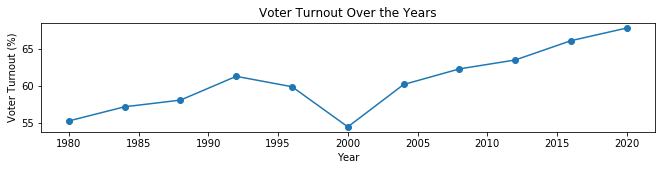

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

#our data
data = {
    'Year': ['1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008', '2012', '2016', '2020'],
    'VoterTurnout': [55.3, 57.2, 58.1, 61.3, 59.9, 54.5, 60.2, 62.3, 63.5, 66.1, 67.8]
}

#creating the DataFrame
df = pd.DataFrame(data)

#converting 'Year' to datetime format and set it as the index
df['Year'] = pd.to_datetime(df['Year'])
df.set_index('Year', inplace=True)

#plotting the data
plt.figure(figsize=(11, 5))
plt.plot(df.index, df['VoterTurnout'], marker='o')

#adding title and labels
plt.title('Voter Turnout Over the Years')
plt.xlabel('Year')
plt.ylabel('Voter Turnout (%)')

#display the plot
plt.show()


### Data Analysis 

In this notebook, we will be using the matplotlib library in Python to visualize fires data in the Brazilian amazon.

The version I am using is from this [Kaggle page](https://www.kaggle.com/datasets/mbogernetto/brazilian-amazon-rainforest-degradation) which also has other interesting data to explore (deforestation). This dataset is credited to INPE, [National Institute for Space Research](https://www.gov.br/inpe/pt-br). 

Essentially what we have is data on amount of fire outbreaks in Brazilian Amazon by *state* (region), *month and year*, *latitude* and *longitud* from 1999 to 2019.

The intention is to use this dataset and these features to visualise the data in a variety of ways, to explore the process of data visualisation and be critical of this process too.

Loading the Dataset
- and displaying the first rows of the dataframe

In [ ]:
# import pandas as pd

#loading the dataset
df = pd.read_csv('brazilian_amazon_fires_1999_2019.csv')

#display the first few rows of the dataframe to understand its structure
df.head()


,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


#### Exploratory Data Analysis (EDA)

Let's perform some basic EDA to get a sense of the data, such as checking for missing values, understanding data types, and exploring initial trends.

In [ ]:

print("Missing values in each column:")
print(df.isnull().sum())

#describing the dataset
df.describe()

#getting the shape of the data
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Missing values in each column:
year         0
month        0
state        0
latitude     0
longitude    0
firespots    0
dtype: int64
The dataset contains 2104 rows and 6 columns.


#### Trend analysis 

Let's analyse the trend in the number of fires over the years.

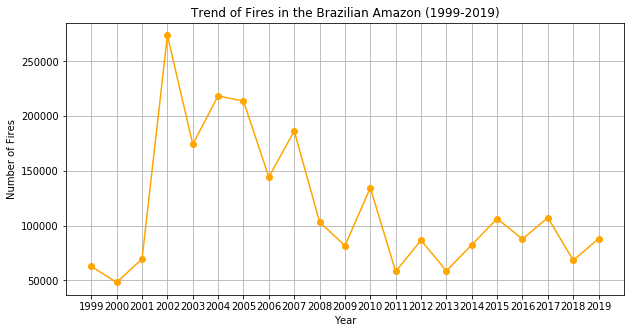

In [ ]:
import matplotlib.pyplot as plt

#grouping data by year and summing the number of fires
df['year'] = pd.to_datetime(df['year'], format='%Y')
yearly_fires = df.groupby(df['year'].dt.year)['firespots'].sum()

#plotting the trend
plt.figure(figsize=(10, 5))
plt.plot(yearly_fires.index, yearly_fires.values, marker='o', color='orange')
plt.title('Trend of Fires in the Brazilian Amazon (1999-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.grid(True)
plt.xticks(yearly_fires.index)
plt.show()


# Code Review


[What is a code review?](https://about.gitlab.com/topics/version-control/what-is-code-review/)

### Four main approaches

##### Pair programming 

![alt text](https://images.ctfassets.net/k428n7s2pxlu/1aJnbCcUvAa4qiIg4kMeI/9c93dd78ff2c7c5ffbff3e14f5878a87/6-reasons-for-pair-programming.jpg)

How does it work?

![https://martinfowler.com/articles/on-pair-programming/driver_navigator.png](https://martinfowler.com/articles/on-pair-programming/driver_navigator.png)


Why do pair programming?
1. Greater efficiency
2. Engaged collaboration
3. Learning from fellow students
4. Social skills
5. Job interview readiness
6. Work environment readiness

#### Tool-assisted reviews 

[github code review features](https://github.com/features/code-review)

#### Over-the-shoulder reviews 

In an over-the-shoulder-review, two developers — the author and reviewer — team up in person or remotely through a shared screen and the author explains the completed change proposal and offers reasoning for the chosen solutions.

#### Email pass-around 

Email pass-arounds are often used for minor difficulties and small pieces of code. They can be conducted via email or source code management systems. During an email pass-around, an author sends an email containing code changes to reviewers.